## Urban land cover data classification prediction using multiclass RBF-SVM model

### ABSTRACT

### INTRODUCTION

Urban land over classification is one of the widest used applications in the feild of remote sensing. The detailed knowledge of land cover is an important input variable for several urban environmental monitoring, especially in some applications like the study of urban sprawl, urban development plan, population or architecture density and monitoring of urban growth. Such target is also corresponding to the 3 strategic area of AISingapore (healthcare, urban and fintech) in 2018.

The overall objective of the architecture recognition is to automatically categorize all pixels in an image into land cover classes or themes. Accordingly the classification algorithms are important for the success of urban land cover classification process. Furthermore, how to improve the classification accuracy is the major challenge which effects the result. A large range of classification algorithms has been developed and applied for classifying data, e.g. SVMs [Support Vector Machines in Remote Sensing: A Review], Random Forests [Random Forest in Remote Sensing: A Review of Applications and
Future Directions], KNNs, DTs and ANN. However, these articles seldom applied in the area of classifying urban cover land, or lack the complete algorithm parameters optimization aimed at enhancing the accuracy.

In this page, SVM (Support Vector Machine) method is mainly used to work as the classifers to urban land cover research. On this basis, procedure of data preparation and preprocessing is described and conducted completely. Thus, cross validation with grid search is used to tuning the significant parameters of RBF-SVMs (select the RBF as the kernal function of SVM), along with other aspects optimization. Finally, results and limits are displayed and discussed.

The dataset we used was obtained from the University of California, Irvine (IUC) Machine
Learning Depository (https://archive.ics.uci.edu/ml/datasets/Urban+Land+Cover).

### BASELINE APPROACH

#### SVM
In [A Practical Guide to Support Vector Classification], the author gave the brief definition of SVMs. Given a training set of instance-label pairs ($x_i$, $y_i$)
\begin{align}
  \nabla \times \vec{\mathbf{B}} -\, \frac1c\, \frac{\partial\vec{\mathbf{E}}}{\partial t} & = \frac{4\pi}{c}\vec{\mathbf{j}} \\
  \nabla \cdot \vec{\mathbf{E}} & = 4 \pi \rho \\
  \nabla \times \vec{\mathbf{E}}\, +\, \frac1c\, \frac{\partial\vec{\mathbf{B}}}{\partial t} & = \vec{\mathbf{0}} \\
  \nabla \cdot \vec{\mathbf{B}} & = 0
\end{align}

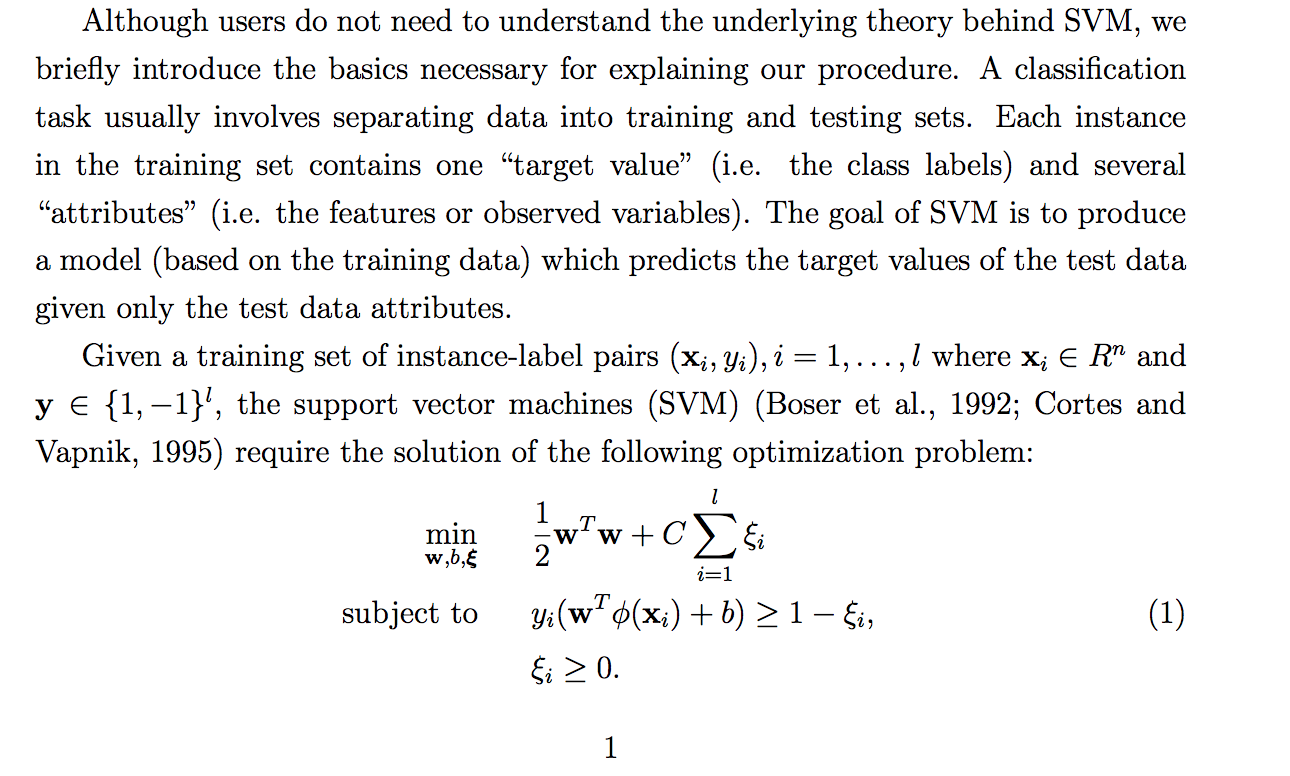

### PROPOSED APPROACH

### EXPERIMENTAL RESULTS

### CONCLUSIONS

### REFERENCES

In [2]:
# -*- coding: utf-8 -*-
__author__ = 'alexjzy'
import numpy as np
import seaborn as sns
np.random.seed(42)
import os

# To plot pretty figures
import matplotlib
import matplotlib.pyplot as plt

# Sklearn part
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics.scorer import make_scorer
from sklearn.metrics import recall_score

# Pandas part
import pandas as pd

# data = pd.read_csv("./dataset/train")
path = os.getcwd()

train_path = "/train.csv"
test_path = "/test.csv"
dataset_path = "/dataset"

data_train = pd.read_csv(path + dataset_path + train_path)
data_test = pd.read_csv(path + dataset_path + test_path)

In [ ]:
# train data visualization







In [3]:
# convert the labels to encode numbers as a new column
def convertClassToEncodeNumber(df, benchmarkCol, newColName):
    labelEncoder = preprocessing.LabelEncoder()  # initial encoder
    labelEncoder.fit(df.loc[:, benchmarkCol])
    encodedData = labelEncoder.transform(df.loc[:, benchmarkCol])
    df[newColName] = encodedData
    return df

# scaler
def standardScaler(df):
    scaler = preprocessing.StandardScaler().fit(df)
    return scaler

# draw confusion matrix
def drawConfusionMatrix(title, cm):
    labels = sorted(data_train.iloc[:, 0].unique())
    ax= plt.subplot()
    heatmap = sns.heatmap(cm, annot=True, cmap="YlGnBu", ax = ax)
    heatmap.xaxis.set_ticklabels(labels, rotation=45); 
    heatmap.yaxis.set_ticklabels(labels, rotation=0);
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.title(title)

In [ ]:
data_train = convertClassToEncodeNumber(data_train, "class", "Y")
data_test = convertClassToEncodeNumber(data_test, "class", "Y")
# several sets of data
# 1:22 ''
# 22:43 40
# 43:64 60
# 64:85 80
# 85:106 100
# 106:127 120
# 127:148 140
trainX = data_train.iloc[:, 1:22]
trainY = data_train.iloc[:, -1]
trainX_scale = standardScaler(trainX).transform(trainX)

testX = data_test.iloc[:, 1:22]
testY = data_test.iloc[:, -1]
testX_scale = standardScaler(trainX).transform(testX)

# SVM RBF
lin_clf = SVC(kernel='poly', random_state=25, decision_function_shape = 'ovo')
lin_clf.fit(trainX, trainY)

trainY_pred = lin_clf.predict(trainX)
accuracyTrain = accuracy_score(trainY, trainY_pred)
print("Train Accuracy: %f" % accuracyTrain)

testY_pred = lin_clf.predict(testX)
accuracyTest = accuracy_score(testY, testY_pred)
print("Test Accuracy: %f" % accuracyTest)

# scores = cross_val_score(lin_clf, trainX_scale, trainY, cv=5)
# lin_clf.score(trainX, trainY)
# lin_clf.score(testX_scale, testY)
# scores



Train Accuracy: 0.911243
Test Accuracy: 0.869048


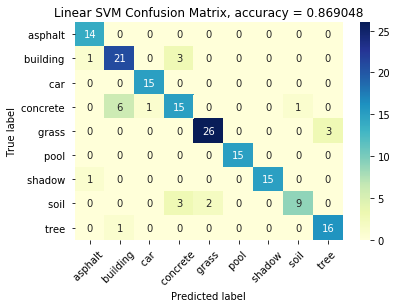

In [344]:
trainY_pred = lin_clf.predict(trainX_scale)
accuracyTrain = accuracy_score(trainY, trainY_pred)
print("Train Accuracy: %f" % accuracyTrain)

testY_pred = lin_clf.predict(testX_scale)
testY_pred

accuracyTest = accuracy_score(testY, testY_pred)
print("Test Accuracy: %f" % accuracyTest)

cm = confusion_matrix(testY, testY_pred)
title = 'Linear SVM Confusion Matrix, accuracy = %f' % accuracyTest
drawConfusionMatrix(title, cm)

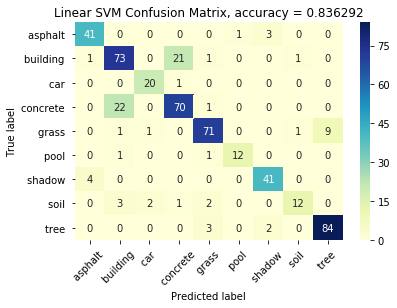

In [153]:
# SVM linear, multi_class = ovr
lin_clf = LinearSVC(random_state=42, multi_class='ovr')
lin_clf.fit(trainX_scale, trainY)
trainY_pred = lin_clf.predict(trainX_scale)
accuracy = accuracy_score(trainY, trainY_pred)
cm = confusion_matrix(trainY, trainY_pred)
title = 'Linear SVM Confusion Matrix, accuracy = %f' % accuracy
drawConfusionMatrix(title, cm)

In [204]:
data_test

,class,BrdIndx,Area,Round,Bright,Compact,ShpIndx,Mean_G,Mean_R,Mean_NIR,...,LW_140,GLCM1_140,Rect_140,GLCM2_140,Dens_140,Assym_140,NDVI_140,BordLngth_140,GLCM3_140,Y
0,car,1.27,91,0.97,231.38,1.39,1.47,207.92,241.74,244.48,...,2.00,0.50,0.85,6.29,1.67,0.70,-0.08,56,3806.36,2
1,concrete,2.36,241,1.56,216.15,2.46,2.51,187.85,229.39,231.20,...,2.25,0.79,0.55,8.42,1.38,0.81,-0.09,1746,1450.14,3
2,concrete,2.12,266,1.47,232.18,2.07,2.21,206.54,244.22,245.79,...,2.19,0.76,0.74,7.24,1.68,0.81,-0.07,566,1094.04,3
3,concrete,2.42,399,1.28,230.40,2.49,2.73,204.60,243.27,243.32,...,3.34,0.82,0.74,7.44,1.36,0.92,-0.09,1178,1125.38,3
4,concrete,2.15,944,1.73,193.18,2.28,4.10,165.98,205.55,208.00,...,50.08,0.85,0.49,8.15,0.23,1.00,-0.08,6232,1146.38,3
5,tree,3.11,169,1.47,172.22,2.49,3.35,240.18,127.65,148.83,...,2.31,0.84,0.79,8.17,1.80,0.68,0.29,866,943.96,8
6,car,1.20,44,0.79,208.80,1.14,1.36,180.95,221.61,223.82,...,2.09,0.87,0.62,8.47,1.46,0.81,-0.08,700,879.82,2
7,car,1.00,88,0.22,234.51,1.11,1.12,208.50,246.48,248.56,...,2.09,0.87,0.62,8.47,1.46,0.81,-0.08,700,879.82,2
8,building,1.59,1737,0.67,219.61,1.30,1.64,185.86,233.84,239.13,...,1.02,0.87,0.91,7.38,2.34,0.11,-0.10,262,848.44,1
9,tree,2.37,153,1.30,120.24,2.85,2.59,184.15,81.50,95.06,...,2.01,0.95,0.57,8.21,1.42,0.74,0.26,372,340.46,8
